In [6]:
# Source: https://data-flair.training/blogs/cartoonify-image-opencv-python/
# Importing the required modules

import cv2 #for image processing
import easygui #to open the filebox
import numpy as np #to store image
import imageio #to read image stored at particular path
import sys
import matplotlib.pyplot as plt
import os
import tkinter as tk

from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image

In [40]:
# Building a File Box to choose a particular file

""" fileopenbox opens the box to choose file
and help us store file path as string """
def upload(width, height):
    ImagePath=easygui.fileopenbox()
    cartoonify(ImagePath, width, height)

In [44]:
def cartoonify(ImagePath, width, height):
    #read the image
    originalmage = cv2.imread(ImagePath)
    originalmage = cv2.cvtColor(originalmage, cv2.COLOR_BGR2RGB)
    print(originalmage.shape)  # image is stored in form of numbers

    # confirm that image is chosen
    if originalmage is None:
        print("Can not find any image. Choose appropriate file")
        sys.exit()

    ReSized1 = cv2.resize(originalmage, (width, height))
    #plt.imshow(ReSized1, cmap='gray')
    
    #converting an image to grayscale
    grayScaleImage = cv2.cvtColor(originalmage, cv2.COLOR_BGR2GRAY)
    ReSized2 = cv2.resize(grayScaleImage, (width, height))
    plt.imshow(ReSized2, cmap='gray')
    
    #applying median blur to smoothen an image
    smoothGrayScale = cv2.medianBlur(grayScaleImage, 5)
    ReSized3 = cv2.resize(smoothGrayScale, (width, height))
    plt.imshow(ReSized3, cmap='gray')
        
    #retrieving the edges for cartoon effect
    #by using thresholding technique
    getEdge = cv2.adaptiveThreshold(smoothGrayScale, 255, 
      cv2.ADAPTIVE_THRESH_MEAN_C, 
      cv2.THRESH_BINARY, 9, 9)

    ReSized4 = cv2.resize(getEdge, (width, height))
    plt.imshow(ReSized4, cmap='gray')
    
    
    #applying bilateral filter to remove noise 
    #and keep edge sharp as required
    colorImage = cv2.bilateralFilter(originalmage, 9, 300, 300)
    ReSized5 = cv2.resize(colorImage, (width, height))
    plt.imshow(ReSized5, cmap='gray')
    
    #masking edged image with our "BEAUTIFY" image
    cartoonImage = cv2.bitwise_and(colorImage, colorImage, mask=getEdge)

    ReSized6 = cv2.resize(cartoonImage, (width, height))
    plt.imshow(ReSized6, cmap='gray')
    
    
    # Plotting the whole transition
    images=[ReSized1, ReSized2, ReSized3, ReSized4, ReSized5, ReSized6]
    fig, axes = plt.subplots(3,2, figsize=(8,8), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap='gray')
    #save button code
    plt.show()

(432, 336, 3)


error: OpenCV(3.4.2) C:\Miniconda3\conda-bld\opencv-suite_1534379934306\work\modules\imgproc\src\smooth.cpp:5179: error: (-215:Assertion failed) (ksize % 2 == 1) && (_src0.dims() <= 2 ) in function 'cv::medianBlur'


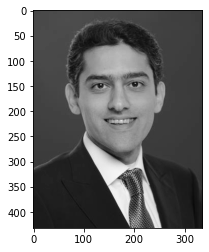

In [45]:
upload(336, 432)